<a href="https://colab.research.google.com/github/Anakha-s/Project-1/blob/main/covid_sent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
###EDA pkgs
import pandas as pd

In [34]:
#data viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
###hide warning
import warnings
warnings.filterwarnings('ignore')

In [37]:
#load Dataset
df = pd.read_csv("covid19_tweets.csv")

In [38]:
#preview
df.head()

user_name         user_location  ...               source is_retweet
0           ᏉᎥ☻լꂅϮ            astroworld  ...   Twitter for iPhone      False
1    Tom Basile 🇺🇸          New York, NY  ...  Twitter for Android      False
2  Time4fisticuffs      Pewee Valley, KY  ...  Twitter for Android      False
3      ethel mertz  Stuck in the Middle   ...   Twitter for iPhone      False
4         DIPR-J&K     Jammu and Kashmir  ...  Twitter for Android      False

[5 rows x 13 columns]

1.text preprocessing
2.sentimental analysis
3.keyword extraction
4.entity extraction

In [39]:
#check columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [40]:
#datatype
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [41]:
#source/value count/distribution of the source
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [42]:
#source/value count/distribution of the sources
df['source'].value_counts()

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
                       ...  
Squarespace                1
www.diolch.wales           1
Metigy                     1
Right Relevance            1
oysttyer                   1
Name: source, Length: 610, dtype: int64

In [43]:
#plot the top value counts
df['source'].value_counts().nlargest(30)

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
Twitter for iPad            4336
Buffer                      2728
Sprout Social               1833
Instagram                   1759
IFTTT                       1545
dlvr.it                      681
GlobalPandemic.NET           679
LinkedIn                     628
COVID19-Updates              625
Twitter Media Studio         596
WordPress.com                537
HubSpot                      513
Sprinklr                     497
FS Poster                    414
Dynamic Signal               391
Resistbot Open Letters       390
Cheap Bots, Done Quick!      335
Paper.li                     322
Twitter for Advertisers      317
Blood Donors India           281
IAMBLOG2TWITTER              266
Alexander Higgins            225
Zoho Social                  224
The Social Jukebox           216
Fabrik.fm                    209
Name: sour

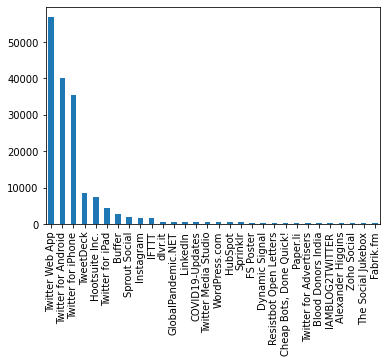

In [44]:
#plot the top value counts
df['source'].value_counts().nlargest(30).plot(kind='bar')

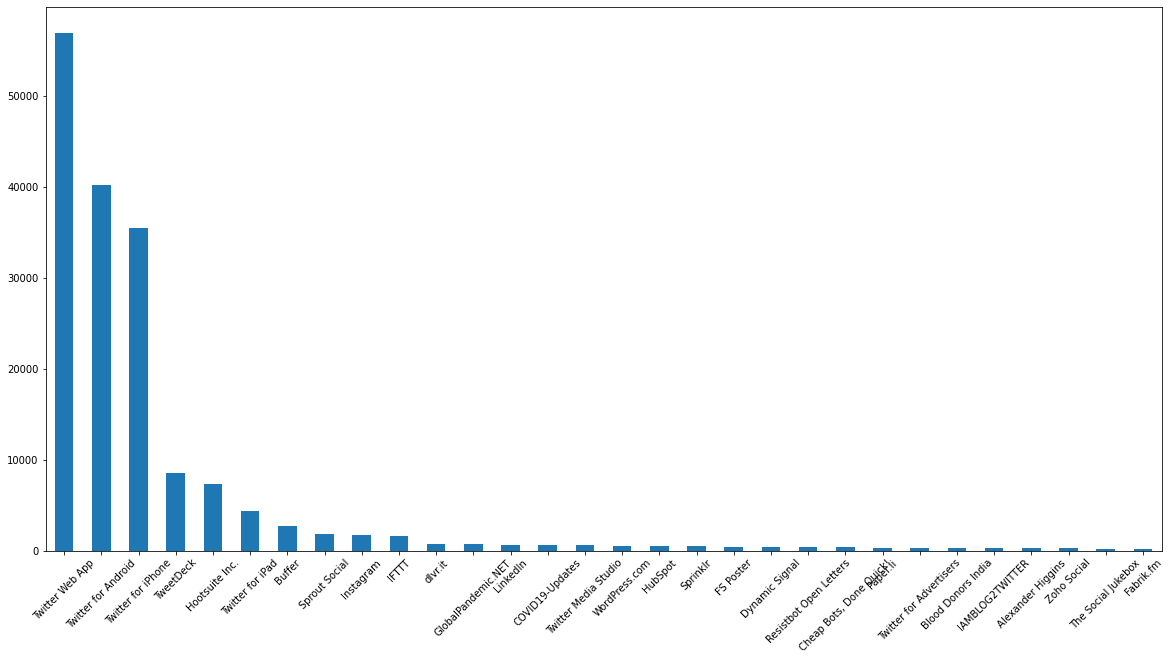

In [45]:
#plot the top value counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### text analysis  of tweet

In [46]:
!pip install neattext

In [47]:
#load text cleaning paackage
import neattext.functions as nfx

In [48]:
#method /attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [49]:
df['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [50]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [ ]:
### noise( remove hashtags/urls/emojis/special char)

In [51]:
df.head()

user_name         user_location  ...               source is_retweet
0           ᏉᎥ☻լꂅϮ            astroworld  ...   Twitter for iPhone      False
1    Tom Basile 🇺🇸          New York, NY  ...  Twitter for Android      False
2  Time4fisticuffs      Pewee Valley, KY  ...  Twitter for Android      False
3      ethel mertz  Stuck in the Middle   ...   Twitter for iPhone      False
4         DIPR-J&K     Jammu and Kashmir  ...  Twitter for Android      False

[5 rows x 13 columns]

In [52]:
df['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [53]:
df['extracted_hashtags']=df['text'].apply(nfx.extract_hashtags)

In [55]:
df[['extracted_hashtags','hashtags']]

extracted_hashtags                           hashtags
0                                    []                                NaN
1                                    []                                NaN
2                            [#COVID19]                        ['COVID19']
3                            [#COVID19]                        ['COVID19']
4       [#CoronaVirusUpdates, #COVID19]  ['CoronaVirusUpdates', 'COVID19']
...                                 ...                                ...
179103                     [#WearAMask]                      ['WearAMask']
179104                       [#COVID19]                        ['COVID19']
179105                               []                                NaN
179106                       [#COVID19]                        ['COVID19']
179107                               []                                NaN

[179108 rows x 2 columns]

In [56]:
##cleaning text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [57]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  @diane3443 @wdunlap @realDonaldTrump Trump nev...
3       @brookbanktv The one gift #COVID19 has give me...  @brookbanktv The one gift   has give me is an ...
4       25 July : Media Bulletin on Novel #CoronaVirus...  25 July : Media Bulletin on Novel     \n@kansa...
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks @IamOhmai for nominating me for the @WH...
179104  2020! The year of insanity! Lol! #COVID19 http...  2020! The year of insanity! Lol!   https://t.c...
179105  @CTVNews A powerful painting by Juan Lucena. I...  @CTVNews A powerful painting by Juan Lucena. I...
179106  More than 1,200 students test positive for #CO...  More than 1,200 students test positive for   a...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...  I stop when I see a Stop\n\n@SABCNews\n@Izinda...

[179108 rows x 2 columns]

In [58]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [59]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey     and   - wouldn't it have made more sen...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...        Trump never once claimed   was a hoax. W...
3       @brookbanktv The one gift #COVID19 has give me...    The one gift   has give me is an appreciatio...
4       25 July : Media Bulletin on Novel #CoronaVirus...  25 July : Media Bulletin on Novel     \n      ...
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks   for nominating me for the     challen...
179104  2020! The year of insanity! Lol! #COVID19 http...  2020! The year of insanity! Lol!   https://t.c...
179105  @CTVNews A powerful painting by Juan Lucena. I...    A powerful painting by Juan Lucena. It's a t...
179106  More than 1,200 students test positive for #CO...  More than 1,200 students test positive for   a...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...  I stop when I see a Stop\n\n \n \n \n \n \n \n...

[179108 rows x 2 columns]

In [60]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [61]:
#cleaning text: remove multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [62]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [63]:
#cleaning text:remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [64]:
#cleaning text:remove punctions
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_punctuations)

In [65]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey and  wouldnt it have made more sense to ha...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   Trump never once claimed was a hoax We all cl...
3       @brookbanktv The one gift #COVID19 has give me...   The one gift has give me is an appreciation f...
4       25 July : Media Bulletin on Novel #CoronaVirus...                 25 July : Media Bulletin on Novel 
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks for nominating me for the challenge I n...
179104  2020! The year of insanity! Lol! #COVID19 http...                     2020 The year of insanity Lol 
179105  @CTVNews A powerful painting by Juan Lucena. I...   A powerful painting by Juan Lucena Its a trib...
179106  More than 1,200 students test positive for #CO...  More than 1200 students test positive for at m...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                          I stop when I see a Stop 

[179108 rows x 2 columns]

In [ ]:
###sentimental Analysis

In [66]:
from textblob import TextBlob

In [67]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity':sentiment_polarity,
            'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result

In [68]:
#Text
ex1=df['clean_tweet'].iloc[0]

In [69]:
get_sentiment(ex1)

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [70]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [71]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [72]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [73]:
pd.json_normalize(df['sentiment_results'].iloc[0])

polarity  subjectivity sentiment
0     -0.25          0.25  Negative

In [74]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [75]:
df.head()

user_name         user_location  ... subjectivity sentiment
0           ᏉᎥ☻լꂅϮ            astroworld  ...     0.250000  Negative
1    Tom Basile 🇺🇸          New York, NY  ...     0.500000  Positive
2  Time4fisticuffs      Pewee Valley, KY  ...     0.000000   Neutral
3      ethel mertz  Stuck in the Middle   ...     0.357143   Neutral
4         DIPR-J&K     Jammu and Kashmir  ...     0.000000   Neutral

[5 rows x 19 columns]

In [76]:
df['sentiment'].value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: sentiment, dtype: int64

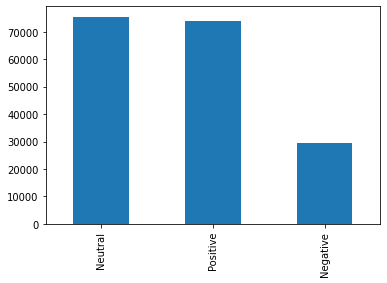

In [77]:
df['sentiment'].value_counts().plot(kind='bar')

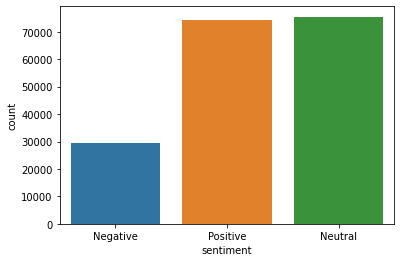

In [78]:
#plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
### Keyword extraction
###for +ve & -ve also for general

In [79]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [80]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']

In [81]:
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [82]:
positive_tweet

1         Hey and  wouldnt it have made more sense to ha...
6         How Will Change Work in General (and recruitin...
8                 Praying for good health and recovery of  
12        👋🏻 — no one will be safe from until everyone i...
13        Lets all protect ourselves from Its real and t...
                                ...                        
179096    We were really bummed we couldn’t cop one of t...
179103    Thanks for nominating me for the challenge I n...
179104                       2020 The year of insanity Lol 
179105     A powerful painting by Juan Lucena Its a trib...
179106    More than 1200 students test positive for at m...
Name: clean_tweet, Length: 74154, dtype: object

In [83]:
##remove stowords and convert to tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()


In [84]:
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [85]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()

In [102]:
negative_tweet_list

['smelled scent hand sanitizers today past think intoxicated that…',
 'deaths continue rise bad Politicians businesses want…',
 'image doesnt list source Id careful overall risk dying statistics related to…',
 'Im feeling little anxious detracted everyones…',
 'Britain didnt understand months plenty countries understand took effective…',
 'Crazy world come Americans fight this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 'sir mom ICU COVID want prayers listening',
 'aka Ill sending 500 people like amp retweet $300 $1500 Cas…',
 'time spike cases isvery hard reverse drastic lockdown time y…',
 'Hi long time preparation reopening homework',
 'OK Im angry believe stupidity virus kills must…',
 'weekend Yall pity year facing cant person…',
 'Shout Earth Hands worst reaction “emergency” I’ve seen Lottery shut and…',
 'Egyptians aint got shit',
 'Yes evidence increased Plus early guidance global PPE shortage priority to…',
 'Cum Check Ill DM Nudes',
 'worst type spread',
 'Agreed 💯% mean exactly problem travellers ❤️ needs

In [103]:
neutral_tweet_list 

['Trump claimed hoax claim effort to…',
 'gift appreciation simple things me…',
 '25 July : Media Bulletin Novel',
 'wear face coverings shopping includes visit local Community Pharmacy…',
 'POPE GOD Prophet Sadhu Sundar Selvaraj Watch',
 '49K+ Covid19 cases response cancel compartment exa…',
 'Order here:',
 'Rajasthan Government today started Plasma Bank Sawai Man Singh Hospital Jaipur treatment COVID19 pa…',
 'Nagaland police Covid19 Awareness City Tower Junction Dimapur',
 'July 25 update 6988 Discharge 7758 People tested 61729 Actice cases 52273 1329',
 'darkest moments focus',
 'Coronavirus South Africa: COVID19 update South Africa (24 July 2020)',
 'Holy water times',
 'Need Type : Bpositive : Jalappa Hospital Blood Component : Need Plasma B+ve recove…',
 'Munitions Response Team modified ops adopted masks disinfectants sanitizers…',
 'imagine people profiting human suffering studying maps 207…',
 'TAX Reform Taxfree minimum: company thousand euros year Taxfree minimum:…',
 'ack

In [86]:
positive_tweet_list

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [87]:
#tokenization
for line in positive_tweet_list:
 # print(line)
 for token in line.split():
    print(token)

Streaming output truncated to the last 5000 lines.
fams
whove
lost
loved
on…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
Especially
it’s
easy
feel
highly
stressed
overwhelmed
Mental
exercises
like
redirecting
t…
It’s
long
day
worth
192708
confirmed
cases
worldwide
Saturday
August
29th
2020
5:00:00
pm
+3151
cases
confirmed
hour
ago
FUN
amp
DELICIOUS…we
want
sure
doesn’t
hurt
log
run
LAB
ANALYTICS…
6955
COVID19
tests
carried
29
August
2020
278
new
cases
detected
111
expatriate
wor…
Quarantined
sweatshirts
available
different
colors
Link
bio
Hong
Kongs
Fire
Eye
Laboratory
ready
support
largescale
testing
provide
oneoff
free
vi…
small
midsize
businesses
represented
significant
shrinking
economy
in…
wonder
it’s
safe
bring
child
pediatrician
hospital
Heres
what…
CBLs
Triad
properties
Friendly
Center
shows
signs
strain
ecommerce
have…
Agreed
sarcastic
Public
health
o

In [88]:
pos_tokens =[token for line in positive_tweet_list for token in line.split()]

In [89]:
neg_tokens =[token for line in negative_tweet_list for token in line.split()]

In [90]:
neu_tokens =[token for line in neutral_tweet_list for token in line.split()]

In [105]:
neu_tokens

['Trump',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'to…',
 'gift',
 'appreciation',
 'simple',
 'things',
 'me…',
 '25',
 'July',
 ':',
 'Media',
 'Bulletin',
 'Novel',
 'wear',
 'face',
 'coverings',
 'shopping',
 'includes',
 'visit',
 'local',
 'Community',
 'Pharmacy…',
 'POPE',
 'GOD',
 'Prophet',
 'Sadhu',
 'Sundar',
 'Selvaraj',
 'Watch',
 '49K+',
 'Covid19',
 'cases',
 'response',
 'cancel',
 'compartment',
 'exa…',
 'Order',
 'here:',
 'Rajasthan',
 'Government',
 'today',
 'started',
 'Plasma',
 'Bank',
 'Sawai',
 'Man',
 'Singh',
 'Hospital',
 'Jaipur',
 'treatment',
 'COVID19',
 'pa…',
 'Nagaland',
 'police',
 'Covid19',
 'Awareness',
 'City',
 'Tower',
 'Junction',
 'Dimapur',
 'July',
 '25',
 'update',
 '6988',
 'Discharge',
 '7758',
 'People',
 'tested',
 '61729',
 'Actice',
 'cases',
 '52273',
 '1329',
 'darkest',
 'moments',
 'focus',
 'Coronavirus',
 'South',
 'Africa:',
 'COVID19',
 'update',
 'South',
 'Africa',
 '(24',
 'July',
 '2020)',
 'Holy',
 'water',
 'time

In [104]:
neg_tokens

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'past',
 'think',
 'intoxicated',
 'that…',
 'deaths',
 'continue',
 'rise',
 'bad',
 'Politicians',
 'businesses',
 'want…',
 'image',
 'doesnt',
 'list',
 'source',
 'Id',
 'careful',
 'overall',
 'risk',
 'dying',
 'statistics',
 'related',
 'to…',
 'Im',
 'feeling',
 'little',
 'anxious',
 'detracted',
 'everyones…',
 'Britain',
 'didnt',
 'understand',
 'months',
 'plenty',
 'countries',
 'understand',
 'took',
 'effective…',
 'Crazy',
 'world',
 'come',
 'Americans',
 'fight',
 'this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 'sir',
 'mom',
 'ICU',
 'COVID',
 'want',
 'prayers',
 'listening',
 'aka',
 'Ill',
 'sending',
 '500',
 'people',
 'like',
 'amp',
 'retweet',
 '$300',
 '$1500',
 'Cas…',
 'time',
 'spike',
 'cases',
 'isvery',
 'hard',
 'reverse',
 'drastic',
 'lockdown',
 'time',
 'y…',
 'Hi',
 'long',
 'time',
 'preparation',
 'reopening',
 'homework',
 'OK',
 'Im',
 'angry',
 'believe',
 'stupidity',
 'virus',
 'kills',
 'must…',
 'weekend',
 

In [91]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [106]:
#Get most common keywords
from collections import Counter

In [114]:
def get_tokens(docx,num=30):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common()
  result = most_common
  return result

In [115]:
get_tokens(pos_tokens)

[('cases', 10310),
 ('new', 9947),
 ('amp', 5298),
 ('positive', 3888),
 ('people', 3655),
 ('New', 3325),
 ('deaths', 3292),
 ('COVID19', 2745),
 ('pandemic', 1929),
 ('total', 1783),
 ('reported', 1773),
 ('safe', 1677),
 ('today', 1661),
 ('confirmed', 1522),
 ('latest', 1468),
 ('like', 1455),
 ('time', 1455),
 ('|', 1454),
 ('good', 1449),
 ('tested', 1398),
 ('need', 1393),
 ('24', 1380),
 ('coronavirus', 1362),
 ('day', 1331),
 ('number', 1270),
 ('right', 1266),
 ('reports', 1264),
 ('India', 1230),
 ('Total', 1227),
 ('2020', 1222),
 ('health', 1219),
 ('vaccine', 1177),
 ('help', 1167),
 ('tests', 1133),
 ('know', 1130),
 ('social', 1107),
 ('world', 1105),
 ('mask', 1102),
 ('important', 1060),
 ('hours', 1034),
 ('August', 1008),
 ('great', 994),
 ('best', 991),
 ('work', 985),
 ('Covid19', 970),
 ('test', 940),
 ('t…', 936),
 ('the…', 934),
 ('better', 932),
 ('2', 899),
 ('death', 896),
 ('days', 888),
 ('1', 877),
 ('testing', 859),
 ('a…', 844),
 ('says', 836),
 ('home'

In [116]:
most_common_pos_word = get_tokens(pos_tokens)
most_common_neg_word = get_tokens(neg_tokens)
most_common_neut_word = get_tokens(neu_tokens)

In [117]:
print(most_common_neg_word)

[('cases', 2245), ('amp', 2033), ('people', 1801), ('pandemic', 895), ('spread', 870), ('daily', 760), ('like', 754), ('COVID19', 748), ('slow', 734), ('new', 723), ('risk', 713), ('deaths', 679), ('symptoms', 621), ('day', 604), ('Help', 573), ('time', 568), ('long', 550), ('y…', 547), ('health', 534), ('identify', 533), ('sooner', 529), ('know', 527), ('selfreporting', 522), ('virus', 516), ('dead', 510), ('hard', 489), ('mask', 478), ('going', 475), ('bad', 474), ('Trump', 459), ('need', 458), ('sick', 454), ('negative', 452), ('past', 442), ('Active', 442), ('India', 437), ('2020', 433), ('|', 432), ('country', 427), ('closed', 421), ('t…', 417), ('worst', 416), ('Americans', 396), ('dont', 386), ('days', 381), ('the…', 377), ('active', 374), ('world', 372), ('2', 370), ('help', 368), ('today', 364), ('Im', 362), ('think', 357), ('coronavirus', 354), ('test', 349), ('to…', 345), ('year', 342), ('care', 342), ('little', 340), ('months', 339), ('a…', 339), ('work', 339), ('small', 33

In [118]:
print(most_common_pos_word)

[('cases', 10310), ('new', 9947), ('amp', 5298), ('positive', 3888), ('people', 3655), ('New', 3325), ('deaths', 3292), ('COVID19', 2745), ('pandemic', 1929), ('total', 1783), ('reported', 1773), ('safe', 1677), ('today', 1661), ('confirmed', 1522), ('latest', 1468), ('like', 1455), ('time', 1455), ('|', 1454), ('good', 1449), ('tested', 1398), ('need', 1393), ('24', 1380), ('coronavirus', 1362), ('day', 1331), ('number', 1270), ('right', 1266), ('reports', 1264), ('India', 1230), ('Total', 1227), ('2020', 1222), ('health', 1219), ('vaccine', 1177), ('help', 1167), ('tests', 1133), ('know', 1130), ('social', 1107), ('world', 1105), ('mask', 1102), ('important', 1060), ('hours', 1034), ('August', 1008), ('great', 994), ('best', 991), ('work', 985), ('Covid19', 970), ('test', 940), ('t…', 936), ('the…', 934), ('better', 932), ('2', 899), ('death', 896), ('days', 888), ('1', 877), ('testing', 859), ('a…', 844), ('says', 836), ('home', 833), ('going', 820), ('case', 819), ('3', 818), ('liv

In [119]:
print(most_common_neut_word)

[('amp', 4544), ('COVID19', 3116), ('cases', 2940), ('people', 2544), ('pandemic', 2110), ('|', 1899), ('deaths', 1868), (':', 1576), ('2020', 1517), ('like', 1474), ('help', 1345), ('need', 1342), ('August', 1290), ('today', 1215), ('mask', 1200), ('India', 1160), ('health', 1129), ('know', 1119), ('time', 1023), ('Coronavirus', 1004), ('Covid19', 980), ('spread', 958), ('coronavirus', 947), ('virus', 930), ('vaccine', 911), ('Trump', 901), ('going', 901), ('testing', 888), ('Health', 886), ('world', 872), ('masks', 865), ('day', 860), ('says', 858), ('2', 841), ('number', 841), ('the…', 819), ('July', 816), ('Dr', 816), ('patients', 806), ('Need', 786), ('died', 764), ('reported', 762), ('work', 761), ('1', 757), ('a…', 752), ('Pandemic', 745), ('country', 741), ('death', 737), ('public', 719), ('Total', 699), ('support', 694), ('dont', 692), ('tested', 687), ('t…', 687), ('home', 685), ('said', 682), ('days', 669), ('want', 661), ('government', 660), ('million', 657), ('face', 642),

In [125]:
##plot with seaborn
neg_df = pd.DataFrame(most_common_neg_word,columns=['words','scores'])

In [126]:
neg_df

words  scores
0          cases    2245
1            amp    2033
2         people    1801
3       pandemic     895
4         spread     870
...          ...     ...
46517   Nigeria:       1
46518  Nigeria’s       1
46519   avocados       1
46520    Widened       1
46521    vessels       1

[46522 rows x 2 columns]